Earlier I pointed out that `seaborn` and the `pandas` plotting tools are both what I referred to as "high-level" visualization tools.

That begs the question: what is a low-level visualization tool?

As I'd previously hinted, `pandas` and `seaborn` both rely on the same low-level plotting library: `matplotlib`.

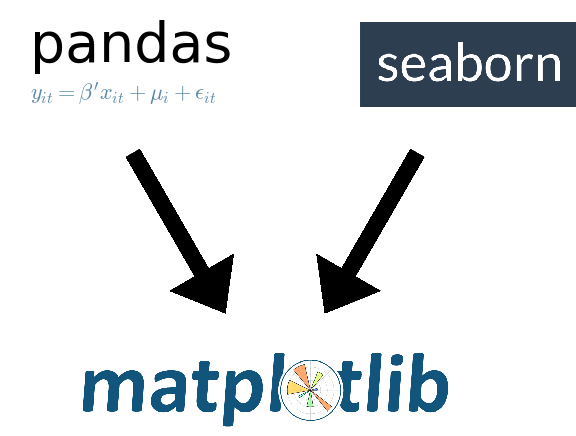

In [3]:
from IPython.display import Image

Image("../figures/pandas-seaborn-matplotlib.png")

`matplotlib` is the granddaddy of all Python plotting tools. It was started way, way back in 2002-ish by John Hunter, also a neurobiologist like Waskom, who's sadly no longer with us. It was designed to be similar to `matplot` plotting tools.

Everything that `pandas` and `seaborn` do is just a wrapper on something that `matplotlib` does. `matplotlib` provides the primitives; these two libraries provide an API.

Of course, `matplotlib` has existed for a long time, and people used to use it directly and still continue to do so. Some examples...

`matplotlib` provides certain high-level plot types:

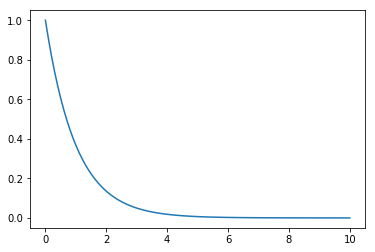

In [5]:
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> a = np.linspace(0,10,100)
>>> b = np.exp(-a)
>>> plt.plot(a,b)
>>> plt.show()

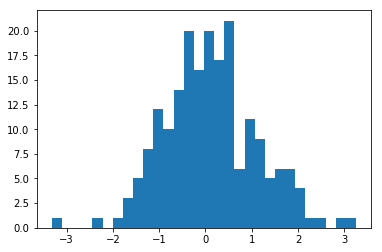

In [4]:
>>> import matplotlib.pyplot as plt
>>> from numpy.random import normal,rand
>>> x = normal(size=200)
>>> plt.hist(x,bins=30)
>>> plt.show()

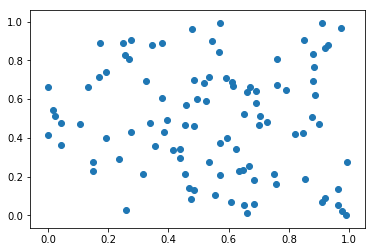

In [6]:
>>> import matplotlib.pyplot as plt
>>> from numpy.random import rand
>>> a = rand(100)
>>> b = rand(100)
>>> plt.scatter(a,b)
>>> plt.show()

Some of these features, like three-dimensional plotting, are truly impressive:

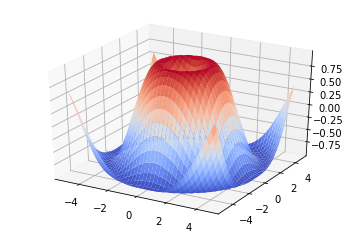

In [7]:
>>> from matplotlib import cm
>>> from mpl_toolkits.mplot3d import Axes3D
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> fig = plt.figure()
>>> ax = fig.gca(projection='3d')
>>> X = np.arange(-5, 5, 0.25)
>>> Y = np.arange(-5, 5, 0.25)
>>> X, Y = np.meshgrid(X, Y)
>>> R = np.sqrt(X**2 + Y**2)
>>> Z = np.sin(R)
>>> surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
>>> plt.show()

However, it's not *quite* what I would call "`pandas`-aware", though it can work with data from the Python data stack generally pretty well out of the box.

`matplotlib` actually have several what I would call "levels" of tools. The high-level ones, some examples of what are above, are reasonable to work with directly. For example, let's compare a `pandas` histogram:

In [10]:
import pandas as pd
pd.set_option('max_columns', None)

collisions = pd.read_csv("../data/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

In [11]:
%matplotlib inline

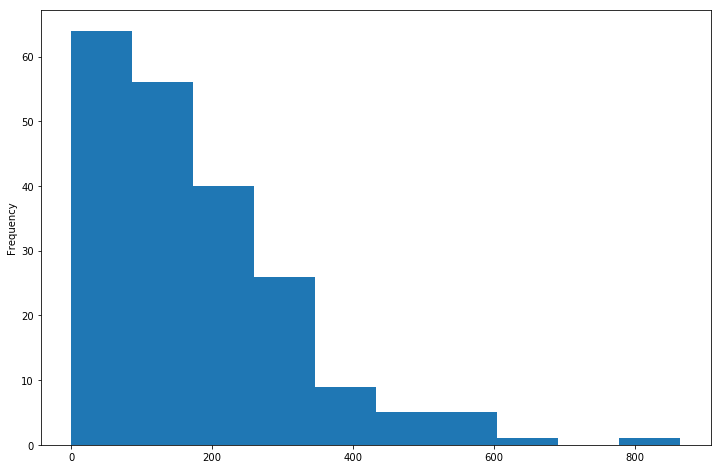

In [12]:
df = (collisions.groupby('ZIP CODE')
        .sum()
        .loc[:, 'NUMBER OF PERSONS INJURED']
        .rename('COUNT(COLLISIONS)'))

df.plot.hist(figsize=(12,8))

With the `matplotlib` equivalent:

(array([ 64.,  56.,  40.,  26.,   9.,   5.,   5.,   1.,   0.,   1.]),
 array([   0. ,   86.4,  172.8,  259.2,  345.6,  432. ,  518.4,  604.8,
         691.2,  777.6,  864. ]),
 <a list of 10 Patch objects>)

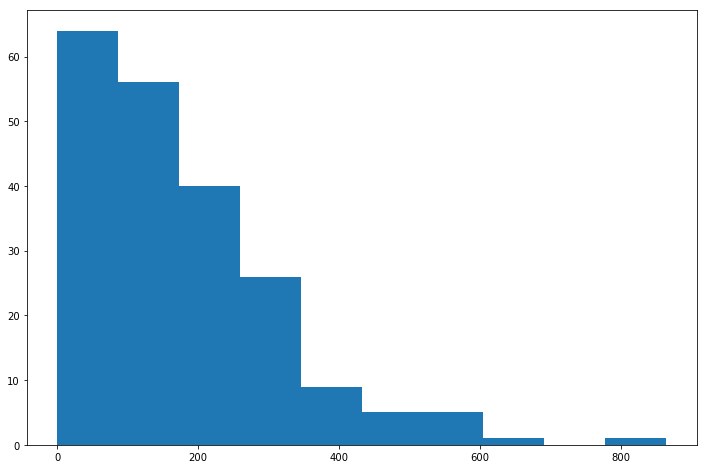

In [22]:
import matplotlib.pyplot as plt
from numpy.random import normal,rand

fig = plt.figure(figsize=(12, 8))
plt.hist(df, bins=10)
# plt.show()

Note that I've removed the (usual) `plt.show()` call to demonstrate what we've actually created: a list of 10 "patch" objects. In this case patch is a `matplotlib` primitive for each of our boxes.

If you read up on the `matplotlib` API, you could probably implement this histogram yourself reasonably easily by creating those patch objects yourself. It would be a bit of an endevour, but it's certainly doable.

Many easy edeas and a few hard ones can be implemented using `matplotlib`'s high-level APIs. Anything you can think of can be implemented using `matplotlib`'s low-level APIs.

But would you really want to implement a grouped bar plot using nothing but rectangles? How long do you think it would take to code up a KDEplot? Luckily, as long as your needs stay within what they can provide, `pandas` and `seaborn` have done this work for you!

In a sense, all that `pandas` and `seaborn` do is minimize the amount of time you have to spend dealing with `matplotlib`. But both still output `matplotlib` objects, and it's important to understand how it works because `matplotlib` is what allows you to tune smaller things about your plots.

Let's start by taking one of our `seaborn` examples from earlier, and tuning it by adding more bars.

In [24]:
import seaborn as sns

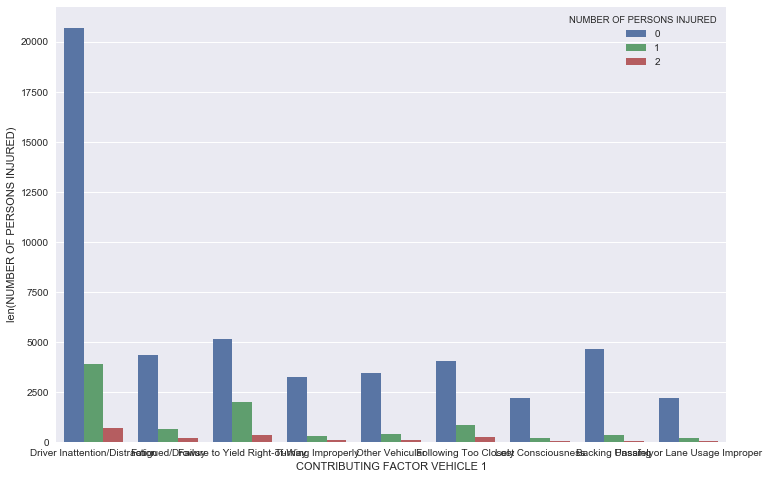

In [30]:
top_collision_factors = collisions['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().iloc[1:10].index

collisions_of_interest = collisions[
    (collisions['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_collision_factors)) &
    (collisions['NUMBER OF PERSONS INJURED'] <= 2)
]

plt.figure(figsize=(12, 8))

sns.barplot(x='CONTRIBUTING FACTOR VEHICLE 1', 
            y='NUMBER OF PERSONS INJURED',
            hue='NUMBER OF PERSONS INJURED',
            estimator=len,
            data=collisions_of_interest)

Oops! Now our text is occluding itself.

To fix this, let's get back into the `matplotlib` code and rotate those text labels. Let's bump up the size of the text as well, while we're at it.

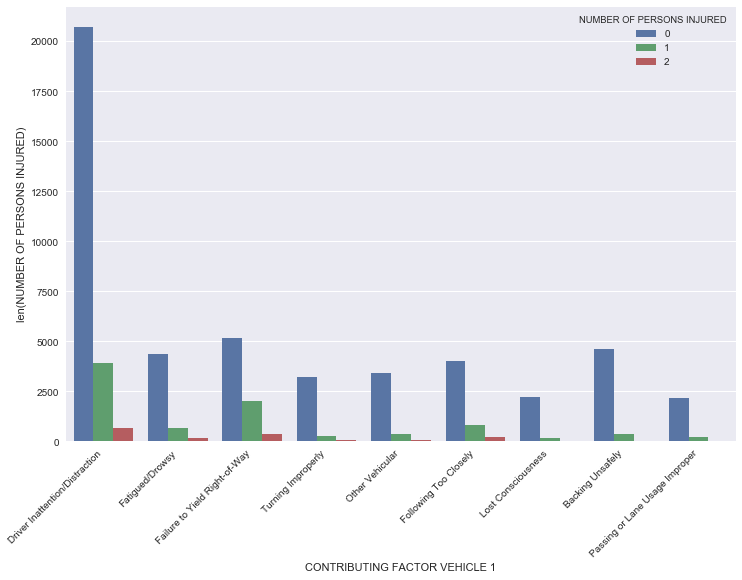

In [39]:
plt.figure(figsize=(12, 8))

sns.barplot(x='CONTRIBUTING FACTOR VEHICLE 1', 
            y='NUMBER OF PERSONS INJURED',
            hue='NUMBER OF PERSONS INJURED',
            estimator=len,
            data=collisions_of_interest)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
pass

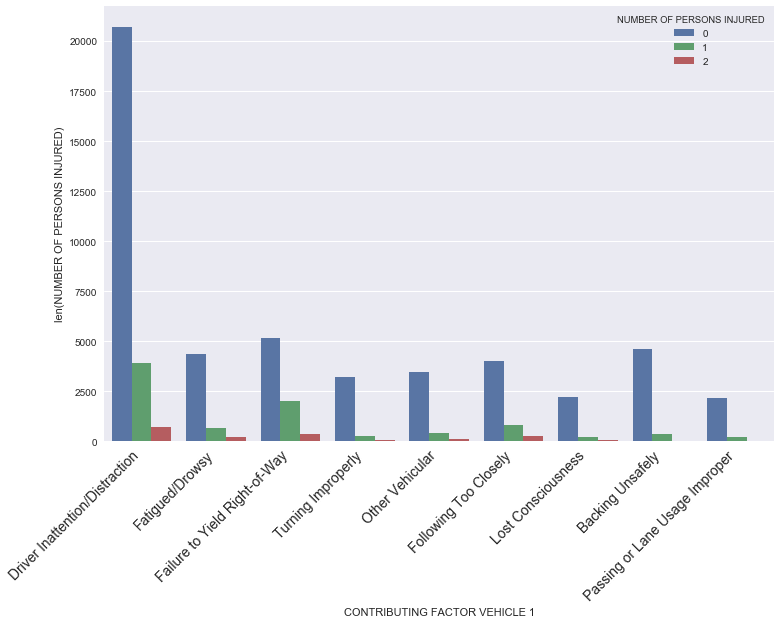

In [50]:
plt.figure(figsize=(12, 8))

sns.barplot(x='CONTRIBUTING FACTOR VEHICLE 1', 
            y='NUMBER OF PERSONS INJURED',
            hue='NUMBER OF PERSONS INJURED',
            estimator=len,
            data=collisions_of_interest)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)

You can also start to adjust the other font sizes, or remove the background, or adjust the legend...all of these things are possible by manipulating the underlying `matplotlib` `Figure`.

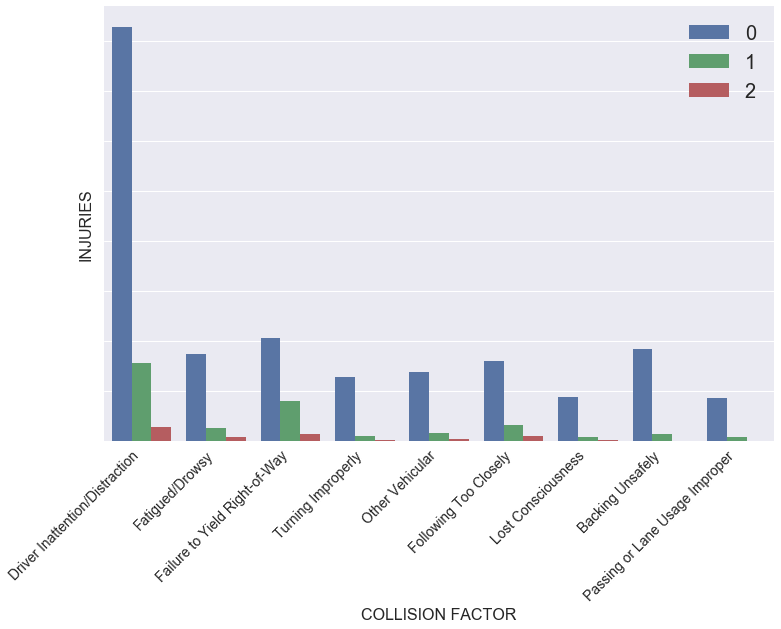

In [65]:
plt.figure(figsize=(12, 8))

sns.barplot(x='CONTRIBUTING FACTOR VEHICLE 1', 
            y='NUMBER OF PERSONS INJURED',
            hue='NUMBER OF PERSONS INJURED',
            estimator=len,
            data=collisions_of_interest)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_ylabel("INJURIES", fontsize=16)
ax.set_xlabel("COLLISION FACTOR", fontsize=16)
ax.legend(prop={'size':20})

Of course, in this case we broke both the legend and the y-axis labels. So I suppose the lesson is also that there's a fair bit of poking around you have to do to determine *what* it is that you want to set, exactly, to get your desired output. I call this form of chartmaking "the Google methodology".

One more thing that's I would be remiss not to point out is that `matplotlib` allows you to stack plots with no additional code necessary. When this makes sense, it's a *really* powerful feature:

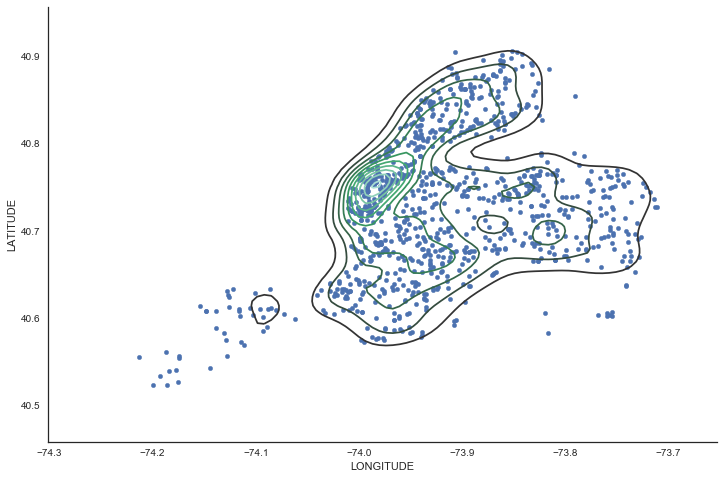

In [92]:
sns.set_style("white")

plt.figure(figsize=(12, 8))

df = collisions[['LATITUDE', 'LONGITUDE']].dropna().sample(20000)

ax = sns.kdeplot(df['LONGITUDE'], df['LATITUDE'])
df.sample(1000).plot.scatter(x='LONGITUDE', y='LATITUDE', ax=ax)

sns.despine()

So at this point we've covered `pandas`, we've covered `seaborn`, and we've examined the interplay about and between the two that can be achieved using `matplotlib`.

This is actually enough to cover most of your conventional plotting needs! It's hard to give an exact figure, but I think I am right to say that far and away the majority of data figures generated in Python today use some combination of these three tools.

However, there's a whole wealth of other tools out there. They can make your life your life easier, give you new ways of doing things, and kind of make you think about how this whole plotting thing works in the first place. In the second half of the presentation, let's explore more broadly!